In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.datasets import  load_breast_cancer
from sklearn import linear_model
from sklearn.model_selection import ShuffleSplit


In [2]:
data = load_breast_cancer()


In [3]:
ss = ShuffleSplit(n_splits=1,
                  train_size=0.5,test_size=0.5)


X = data.data
y = data.target

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train,y_test = y[train_index], y[test_index]

In [4]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
data.feature_names[4], data.feature_names[3]

('mean smoothness', 'mean area')

Text(0, 0.5, 'mean smoothness')

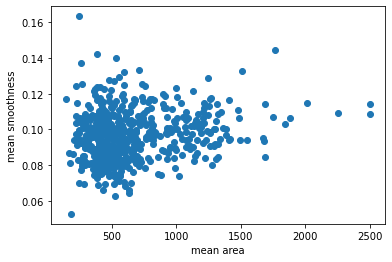

In [6]:

plt.scatter(data.data[:,3], data.data[:,4])
plt.xlabel(data.feature_names[3])
plt.ylabel(data.feature_names[4])


Text(0, 0.5, 'mean smoothness')

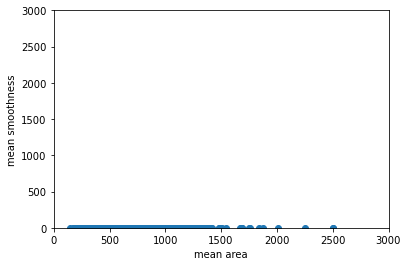

In [7]:
plt.scatter(data.data[:,3], data.data[:,4])
plt.xlim(0,3000)
plt.ylim(0,3000)
plt.xlabel(data.feature_names[3])
plt.ylabel(data.feature_names[4])


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)


In [10]:
X_train_scale.mean(axis=0), X_train_scale.std(axis=0)


(array([ 1.17668004e-16,  1.00369634e-15,  9.27661703e-16, -5.43383804e-16,
         1.74957857e-15, -2.80878607e-16, -1.08520391e-15, -2.47454639e-16,
         1.53574336e-15, -4.74747393e-15,  8.30517189e-16, -1.30021189e-15,
        -1.57913588e-15,  2.53123031e-16, -5.39474568e-16, -9.14761225e-16,
        -1.34086795e-16, -9.06942753e-16, -2.23278458e-15,  1.83382261e-15,
         1.04337509e-15,  3.64824563e-15,  7.10699105e-16, -1.84906863e-16,
        -1.21655424e-15, -7.42754840e-18,  2.40418014e-16, -2.49018333e-16,
         1.23570950e-15,  3.39986255e-15]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

(array([[  0.,  75., 141.,  55.,  10.,   3.,   0.,   0.,   0.,   0.],
        [  2.,  74., 127.,  68.,  11.,   2.,   0.,   0.,   0.,   0.],
        [  0.,  72., 141.,  57.,  10.,   4.,   0.,   0.,   0.,   0.],
        [  0.,  64., 157.,  48.,  10.,   3.,   2.,   0.,   0.,   0.],
        [  5.,  66., 132.,  67.,  13.,   1.,   0.,   0.,   0.,   0.],
        [  0.,  73., 144.,  47.,  17.,   3.,   0.,   0.,   0.,   0.],
        [  0.,  82., 127.,  58.,  13.,   4.,   0.,   0.,   0.,   0.],
        [  0.,  85., 120.,  61.,  15.,   3.,   0.,   0.,   0.,   0.],
        [  3.,  70., 133.,  65.,  12.,   1.,   0.,   0.,   0.,   0.],
        [  0.,  72., 139.,  56.,  15.,   1.,   1.,   0.,   0.,   0.],
        [  0.,  39., 197.,  30.,  15.,   1.,   0.,   0.,   2.,   0.],
        [  0.,  76., 142.,  49.,  13.,   3.,   1.,   0.,   0.,   0.],
        [  0.,  36., 203.,  28.,  14.,   1.,   0.,   0.,   1.,   1.],
        [  0.,   0., 241.,  33.,   8.,   0.,   0.,   0.,   0.,   2.],
        [  0.,  67.,

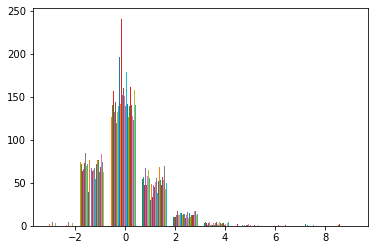

In [11]:
plt.hist(X_train_scale)

(array([[284.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [284.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [284.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 73., 147.,  42.,  17.,   3.,   2.,   0.,   0.,   0.,   0.],
        [284.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [284.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [284.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [284.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [284.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [284.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [284.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [284.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [284.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [282.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [284.,   0.,

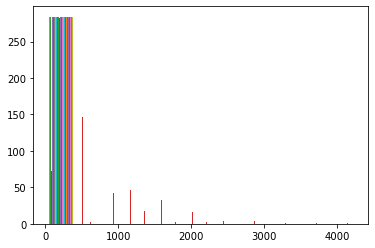

In [12]:
plt.hist(X_train)

In [13]:
X_test_scale = scaler.transform(X_test)


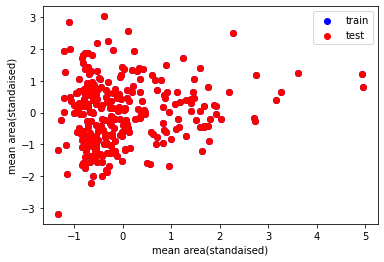

In [14]:
plt.scatter(X_train_scale[:, 3],
             X_train_scale[:, 4], 
             c='blue',
             label='train')
plt.scatter(X_train_scale[:, 3],
            X_train_scale[:, 4],c='red', label='test')
plt.xlabel(data.feature_names[3]+"(standaised)")
plt.ylabel(data.feature_names[3]+"(standaised)")
plt.legend(loc="best")


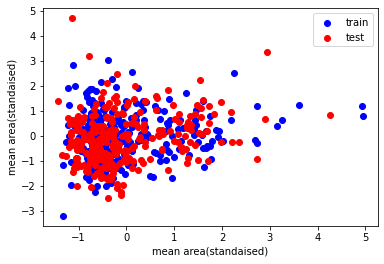

In [15]:
plt.scatter(X_train_scale[:, 3],
             X_train_scale[:, 4], 
             c='blue',
             label='train')
plt.scatter(X_test_scale[:, 3],
            X_test_scale[:, 4],c='red', label='test')
plt.xlabel(data.feature_names[3]+"(standaised)")
plt.ylabel(data.feature_names[3]+"(standaised)")
plt.legend(loc="best")


In [16]:
from sklearn import linear_model

clf = linear_model.LogisticRegression()
clf.fit(X_train_scale, y_train)
clf.score(X_test_scale, y_test)



0.9649122807017544

In [17]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


/home/ma/.bin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9263157894736842

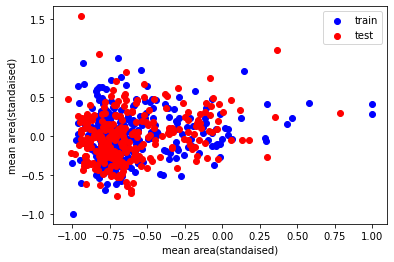

In [20]:
from sklearn.preprocessing import MinMaxScaler
mmsclaer = MinMaxScaler([-1,1])

mmsclaer.fit(X_train)

X_train_mmscale = mmsclaer.transform(X_train)

X_test_mmscale = mmsclaer.transform(X_test)

plt.scatter(X_train_mmscale[:, 3],
             X_train_mmscale[:, 4],
             c='blue',
             label='train')
plt.scatter(X_test_mmscale[:, 3],
            X_test_mmscale[:, 4],c='red', label='test')
plt.xlabel(data.feature_names[3]+"(standaised)")
plt.ylabel(data.feature_names[3]+"(standaised)")
plt.legend(loc="best")


In [21]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()



X_train_scale = normalizer.transform(X_train)

X_train_scale.mean(axis=0), X_train_scale.std(axis=0)

X_test_scale = normalizer.transform(X_test)
